# Weater Data Extraction and Analysis

This notebook seeks to examine the weather data files and hopefully develop a means for easy extraction and Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
# import data
f = open("TillamookOR.txt", 'r')
# get all lines
lines = f.readlines()

In [36]:
original_list = lines[0].strip("\n").split(" ")
new_list = []
for val in original_list:
    if len(val) >0:
        new_list.append(val)
new_list

['TMOR', '45.4', '123.8', '390.0', '0.0', '0.3']

In [44]:
def str_list_condense(lines,index):
    """
    Takes a list and which index we are looking at which is essentially just a list of lines
    
    returns the new condensed list
    """
    original_list = lines[index].strip("\n").split(" ")
    new_list = []
    for val in original_list:
        if len(val) >0:
            new_list.append(val)
    new_list
    return new_list
def convert_textfile(file_name, headers):
    """
    Takes input of filename
    
    Will then subsequently utilize the helper function 

    """
    data = {

    }

    # add data
    with open(file_name, 'r') as f:
        lines =  f.readlines()
        # add headers to dictionary
        for k in headers:
            if k not in data:
                data[k] = []
        # add data (skip row 1)
        for row in range(1,len(lines)):
            data_list = str_list_condense(lines,row)
            ## add data to dictionary
            for k in range(len(data_list)):
                data[list(data.keys())[k]] .append(data_list[k])
    return data
        # next then add data to relevant heading
headers = ["Year and Day of Year", "Solar Radiation", "Mean Temp (C)", "Max Temp (C)", "Min Temp (C)","Total Precipitation (mm)","average wind speed (m/s)"]
data_wth = convert_textfile("TillamookOR.txt",headers)

In [98]:
df_wth = pd.DataFrame(data_wth)
df_wth.head()

,Year and Day of Year,Solar Radiation,Mean Temp (C),Max Temp (C),Min Temp (C),Total Precipitation (mm),average wind speed (m/s)
0,80001,3.4,12.0,15.0,8.0,5.1,3.3
1,80002,2.6,9.0,12.0,6.0,16.3,3.4
2,80003,1.1,5.0,9.0,1.0,0.5,3.7
3,80004,1.1,6.0,8.0,4.0,10.7,3.4
4,80005,2.1,6.0,9.0,2.0,21.8,3.0


In [66]:
df_wth['Year and Day of Year'][0]

datetime.datetime(1980, 1, 1, 0, 0)

In [52]:
'1001'.zfill(5)

'01001'

In [53]:
import datetime
datetime.date.fromordinal(3142)

datetime.date(9, 8, 8)

In [99]:
from datetime import timedelta,datetime
def data_conversion(data):
    """Converting the Year and Day of Year to actual datetime, only 365 days allowed per year"""
    for row in range(len(data['Year and Day of Year'])):
        adj_time = data['Year and Day of Year'][row].zfill(5)
        ## first two values in string dictate year
        year = adj_time[:2]
        if int(year[0]) == 0:
            year = "200"+year[1]
        elif int(year) < 25:
            year = "20" +year
        elif int(year) > 25:
            year = "19"+year
        year = int(year)
        ## last three values dictate the day of the year
        day = int(adj_time[2:])

        # use timedelta to get the datetime
        ## first day of year
        jan1 = datetime(year, 1, 1)
        ## edge case where it is first day of year
        if day == 1:
            date_t = jan1

        else:
            ## adjustment
            delta_t = timedelta(days=day-1)
            ## apply adjustement to get datetime
            date_t = jan1+delta_t
        # now replace date_t in the dateframe
        data['Year and Day of Year'][row] = date_t
    return data






df_wth = data_conversion(df_wth)
df_wth.rename(columns = {'Year and Day of Year':'Date'},inplace = True)
df_wth

,Date,Solar Radiation,Mean Temp (C),Max Temp (C),Min Temp (C),Total Precipitation (mm),average wind speed (m/s)
0,1980-01-01 00:00:00,3.4,12.0,15.0,8.0,5.1,3.3
1,1980-01-02 00:00:00,2.6,9.0,12.0,6.0,16.3,3.4
2,1980-01-03 00:00:00,1.1,5.0,9.0,1.0,0.5,3.7
3,1980-01-04 00:00:00,1.1,6.0,8.0,4.0,10.7,3.4
4,1980-01-05 00:00:00,2.1,6.0,9.0,2.0,21.8,3.0
...,...,...,...,...,...,...,...
9485,2005-12-27 00:00:00,1.6,13.0,16.0,10.0,20.8,4.7
9486,2005-12-28 00:00:00,3.1,12.0,14.0,10.0,42.7,4.7
9487,2005-12-29 00:00:00,2.4,12.0,13.0,11.0,33.3,5.0
9488,2005-12-30 00:00:00,1.9,11.0,12.0,9.0,8.4,5.4


## Analysis -> Precipitation


In [100]:
df_wth['Date'][0] +datetime(year =2)         

TypeError: function missing required argument 'month' (pos 2)

In [88]:
datetime(year = 1982, month =1, day =1)

datetime.datetime(1982, 1, 1, 0, 0)

In [101]:
# Begining Year?
Start_Year =  2
Num_Years = 25

data_OSU = df_wth[df_wth['Date'] >= datetime(year = df_wth['Date'][0].year +2, month =1 , day = 1 )]


In [102]:
data_OSU

,Date,Solar Radiation,Mean Temp (C),Max Temp (C),Min Temp (C),Total Precipitation (mm),average wind speed (m/s)
730,1982-01-01 00:00:00,1.7,3.0,6.0,0.0,13.0,4.7
731,1982-01-02 00:00:00,4.5,3.0,7.0,-1.0,3.8,4.9
732,1982-01-03 00:00:00,1.2,3.0,6.0,0.0,14.7,4.9
733,1982-01-04 00:00:00,7.2,4.0,7.0,2.0,19.6,1.8
734,1982-01-05 00:00:00,3.0,2.0,6.0,-2.0,14.0,2.4
...,...,...,...,...,...,...,...
9485,2005-12-27 00:00:00,1.6,13.0,16.0,10.0,20.8,4.7
9486,2005-12-28 00:00:00,3.1,12.0,14.0,10.0,42.7,4.7
9487,2005-12-29 00:00:00,2.4,12.0,13.0,11.0,33.3,5.0
9488,2005-12-30 00:00:00,1.9,11.0,12.0,9.0,8.4,5.4


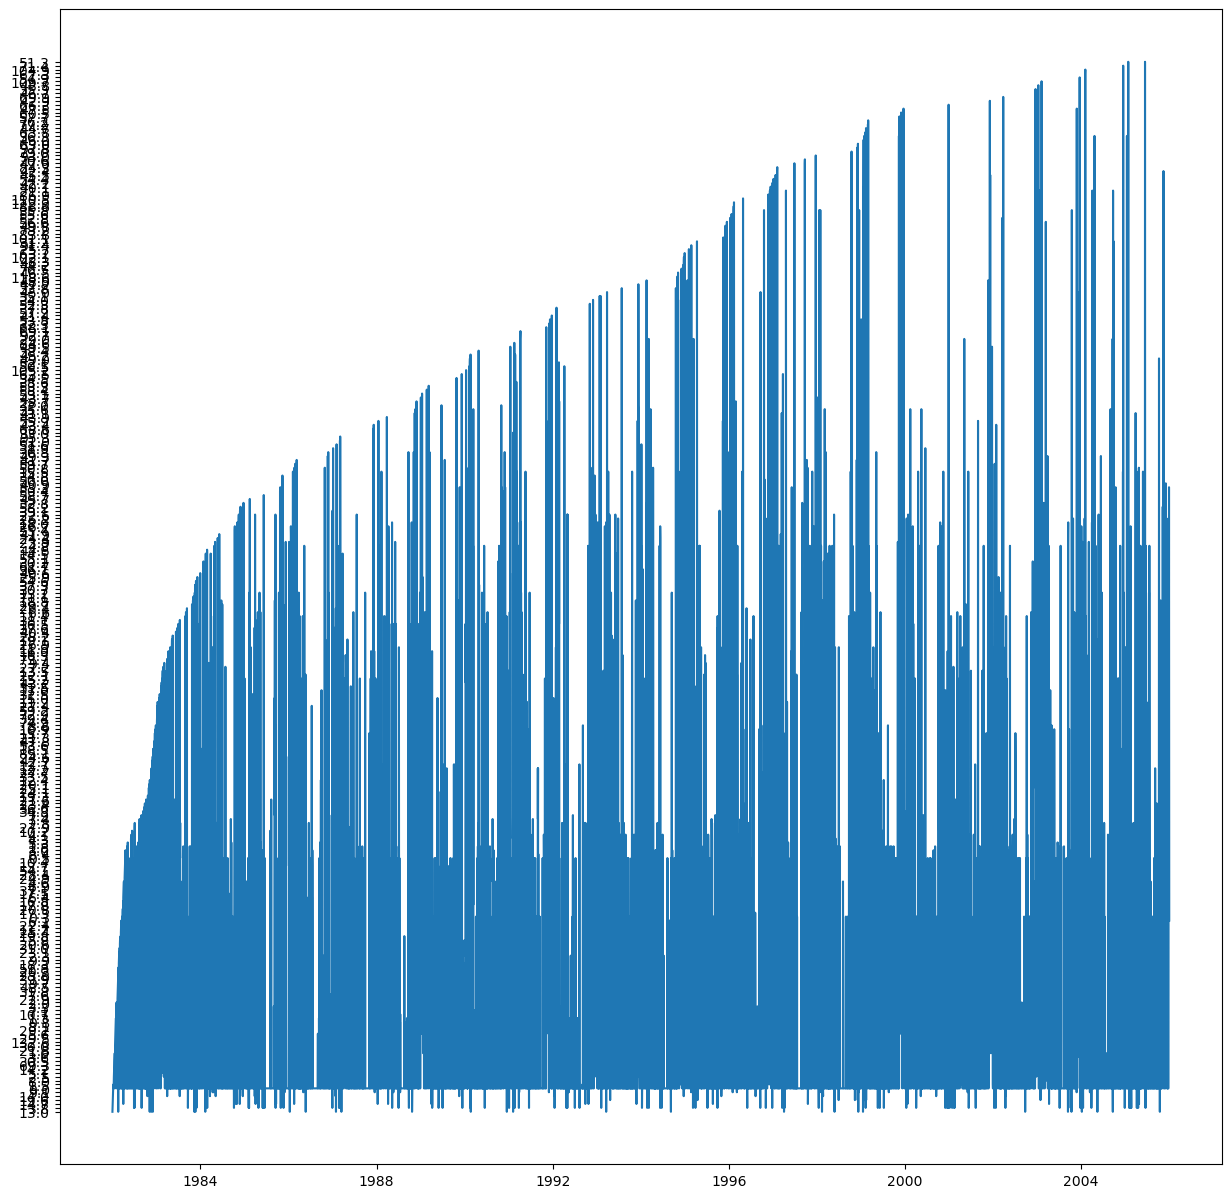

In [109]:
plt.figure(figsize = (15,15))
plt.plot(data_OSU['Date'],data_OSU['Total Precipitation (mm)'])

plt.show()